In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_cityride_df = city_data_df.merge(ride_data_df, how='outer', on='city')
total_rides = combined_cityride_df["ride_id"].count()

# Display the data table for preview
combined_cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

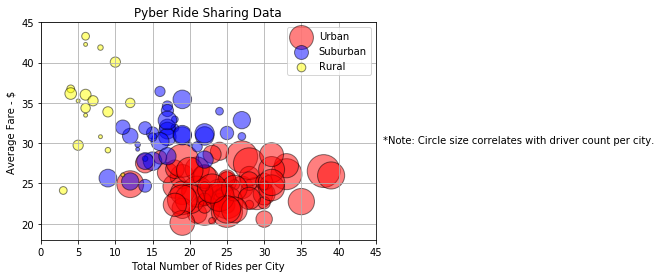

In [2]:
#####################################################################################################
#THINKING# 
#Obtain the x and y coordinates for each of the three city types
# city_types_df = combined_cityride_df.groupby(["type","city"])
# total_rides = len(combined_cityride_df['date'].unique())
# gross_fare = combined_cityride_df['fare'].sum()
# avg_fare=gross_fare/total_rides
# combined_cityride_df.set_index('type',inplace=True)
# urban_driver_count = urban_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']
# urban_total_rides = len(urban_df['ride_id'])
# urban_revenue = sum(urban_df['fare'])
# urban_avg_fare = round((urban_revenue/urban_total_rides),2)
# print(urban_total_rides)
# print(urban_revenue)
# print(urban_avg_fare)
# sub_urban_df = combined_cityride_df.loc[combined_cityride_df["type"]=="Suburban"]
# sub_urban_total_rides =len(sub_urban_df['ride_id'])
# sub_urban_revenue = round(sum(sub_urban_df['fare']))
# sub_urban_avg_fare = round((sub_urban_revenue/sub_urban_total_rides),2)
# sub_urban_driver_count = sub_urban_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']
# # print(sub_urban_total_rides)
# # print(sub_urban_revenue)
# # print(sub_urban_avg_fare)
# rural_df = combined_cityride_df.loc[combined_cityride_df["type"]=="Rural"]
# rural_total_rides = len(rural_df['ride_id'])
# rural_revenue = sum(rural_df['fare'])
# rural_avg_fare = round((rural_revenue/rural_total_rides),2)
# rural_driver_count = rural_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']
# # print(rural_total_rides)
# # print(rural_revenue)
# # print(rural_avg_fare)
# # urban_scatter = plt.scatter(total_rides, urban_avg_fare, marker="o", facecolors="red", edgecolors="black", s=urban_driver_count)
# # sub_urban_scatter = plt.scatter(total_rides, sub_urban_avg_fare, marker="o", facecolors="b", edgecolors="black", s=sub_urban_driver_count)
# # rural_scatter = plt.scatter(total_rides, rural_avg_fare, marker="o", facecolors="g", edgecolors="black", s=rural_driver_count)
#####################################################################################################

#Urban
urban_df = combined_cityride_df.loc[combined_cityride_df["type"]=="Urban"]
urban_driver_count = city_data_df.loc[city_data_df['type']=='Urban']
urban_driver = urban_driver_count['driver_count']
urban_ridercount = urban_df.groupby(['city']).count()['ride_id']
urban_avg_fare = urban_df.groupby(['city']).mean()['fare']

#Suburban
sub_urban_df = combined_cityride_df.loc[combined_cityride_df["type"]=="Suburban"]
sub_urban_driver_count = city_data_df.loc[city_data_df['type']=='Suburban']
sub_urban_driver = sub_urban_driver_count['driver_count']
sub_urban_ridercount = sub_urban_df.groupby(['city']).count()['ride_id']
sub_urban_avg_fare = sub_urban_df.groupby(['city']).mean()['fare']

#Rural
rural_df = combined_cityride_df.loc[combined_cityride_df["type"]=="Rural"]
rural_driver_count = city_data_df.loc[city_data_df['type']=='Rural']
rural_driver = rural_driver_count['driver_count']
rural_ridercount = rural_df.groupby(['city']).count()['ride_id']
rural_avg_fare = rural_df.groupby(['city']).mean()['fare']

#Build the scatter plots for each city types
urban_scatter = plt.scatter(urban_ridercount, urban_avg_fare, marker="o", facecolors="red", edgecolors="black", s=urban_driver*15, alpha=.5, label="Urban")
sub_urban_scatter = plt.scatter(sub_urban_ridercount, sub_urban_avg_fare, marker="o", facecolors="Blue", edgecolors="black", s=sub_urban_driver*15, alpha=.5, label="Suburban")
rural_scatter = plt.scatter(rural_ridercount, rural_avg_fare, marker="o", facecolors="yellow", edgecolors="black", s=rural_driver*15, alpha=.5, label="Rural")

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare - $")
plt.xlabel("Total Number of Rides per City")
plt.grid(True)
 
# Create a legend and title
plt.legend(handles=[urban_scatter, sub_urban_scatter,rural_scatter], loc="best")

# Incorporate a text label regarding circle size

#Establish Lims
plt.xlim(0,45)
plt.ylim(18,45)
plt.text(46, 30,"*Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberHomeworkScatter.png")

#Show plot
plt.show()

## Total Fares by City Type

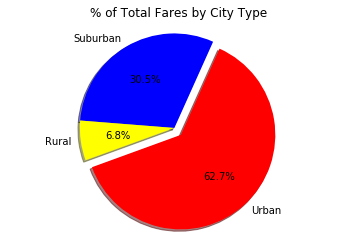

In [4]:
# Calculate Type Percents
urban_revenue = sum(urban_df['fare'])
sub_urban_revenue = sum(sub_urban_df['fare'])
rural_revenue = sum(rural_df['fare'])

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_revenue, sub_urban_revenue, rural_revenue]

# The colors of each section of the pie chart
colors = ["red", "blue", "yellow"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (.1, 0, 0)

#Build Pie? Recipe for Pie
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure
plt.savefig("PyberHomeworkPie1.png")

#Show Figure
plt.axis("equal")
plt.show()

## Total Rides by City Type

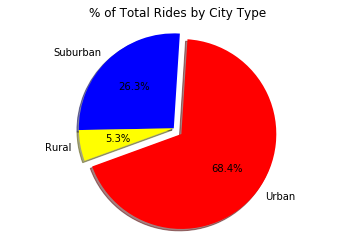

In [5]:
# Calculate Ride Percents
pie_urban_ridercount = sum(urban_ridercount)
pie_sub_urban_ridercount= sum(sub_urban_ridercount)
pie_rural_ridercount = sum(rural_ridercount)

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [pie_urban_ridercount, pie_sub_urban_ridercount, pie_rural_ridercount]

# The colors of each section of the pie chart
colors = ["red", "blue", "yellow"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (.1, 0, 0)

#Build Pie? Recipe for Pie
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure
plt.savefig("PyberHomeworkPie2.png")

#Show Figure
plt.axis("equal")
plt.show()

## Total Drivers by City Type

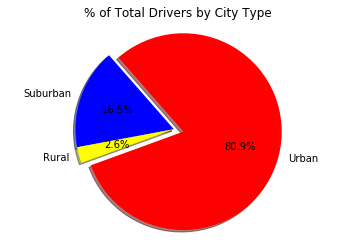

In [6]:
# Calculate Driver Percents
pie_urban_driver = sum(urban_driver)
pie_sub_urban_driver= sum(sub_urban_driver)
pie_rural_driver = sum(rural_driver)

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [pie_urban_driver, pie_sub_urban_driver, pie_rural_driver]

# The colors of each section of the pie chart
colors = ["red", "blue", "yellow"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (.1, 0, 0)

#Build Pie? Recipe for Pie
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure
plt.savefig("PyberHomeworkPie3.png")

#Show Figure
plt.axis("equal")
plt.show()
